In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Past Hammoz

In [2]:
model = xr.open_dataset('E://faks//cda//cmip6//ham_hist_interpo.nc')
time_slice = slice('1981-01-01T00:00:00.000000000','2014-12-31T23:30:00.000000000')
modelsel = model.sel(time=time_slice)
model_ham = modelsel.tas.drop_vars(['lat', 'lon','height']).sel(time=modelsel.time.dt.month.isin([1, 2, 3, 12])) - 273.15

### Bias correction

In [83]:
bias_set = xr.open_dataset('E://faks//cda//era5//bias_monthly.nc')
bias = bias_set.__xarray_dataarray_variable__.values

In [85]:
model_ham_grouped = model_ham.groupby(model_ham.time.dt.month)
months = [1, 2, 3, 12]
bias_index = 0
for month in months:
    model_ham_group = model_ham_grouped[month]
    model_ham_without_bias = model_ham_group - bias[bias_index]
    bias_index = bias_index + 1

In [86]:
model_ham_without_bias

<xarray.DataArray 'tas' (time: 25296)>
array([-0.01707089,  0.03178775,  0.08388126, ...,  7.5889473 ,
        7.788349  ,  7.974201  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-12-01T00:29:59.999999488 ... 2014-12-...
    height   float64 ...
    lat      int32 ...
    lon      int32 ...

## And now the apples..

### Utah

In [87]:
temp=model_ham_without_bias
temp1=xr.where((temp>= 1.5) & (temp <= 2.4), 0.5 , np.nan)
temp2=xr.where((temp>= 2.5) & (temp <= 9.1), 1, np.nan)
temp3=xr.where((temp>= 9.2) & (temp <= 12.4), 0.5 , np.nan)
temp4=xr.where((temp>= 12.5) & (temp <= 15.9), 0 , np.nan)
temp5=xr.where((temp>= 16) & (temp <= 18), (-0.5) , np.nan)
temp6=xr.where((temp>= 18), -1 , np.nan)
hours = temp1 + temp2 + temp3 + temp4 + temp5 + temp6

In [88]:
yearsum1 = temp1.groupby('time.year').sum(dim='time')
yearsum2 = temp2.groupby('time.year').sum(dim='time')
yearsum3 = temp3.groupby('time.year').sum(dim='time')
yearsum4 = temp4.groupby('time.year').sum(dim='time')
yearsum5 = temp5.groupby('time.year').sum(dim='time')
yearsum6 = temp6.groupby('time.year').sum(dim='time')

In [89]:
yearsum = yearsum1 + yearsum2 + yearsum3 + yearsum4 + yearsum5 + yearsum6

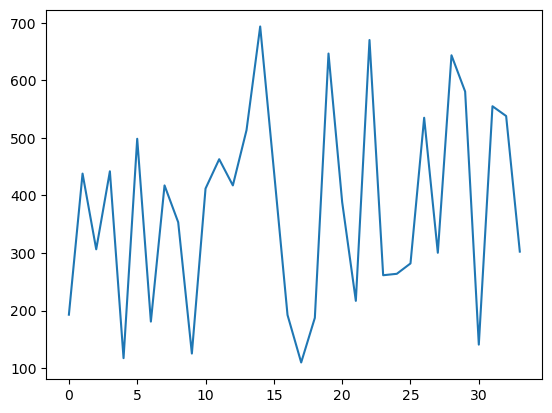

In [90]:
plt.plot(yearsum)

### Chill hour

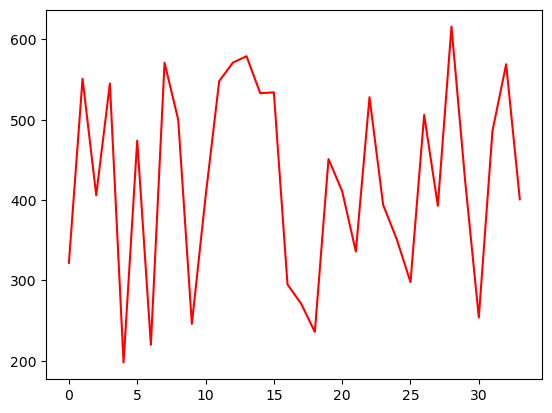

In [92]:
chill_hours = xr.where((temp>= 0) & (temp <= 7.2), 1 , np.nan)    #returns the variable 'chill_hours' with boolean values
chill_hours_year = chill_hours.groupby('time.year').sum(dim='time')
plt.plot(chill_hours_year, color='red')

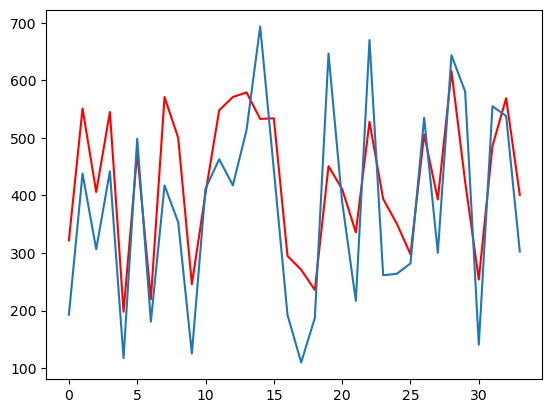

In [93]:
#comparison between apple models
plt.plot(chill_hours_year, color='red') #chill hour model
plt.plot(yearsum) #utah

# Future Hammoz

In [97]:
model_ssp = xr.open_dataset('E://faks//cda//cmip6//Hammoz_ssp_merge_new.nc')
model_ham_ssp = model_ssp.tas.drop_vars(['lat', 'lon','height']).sel(time=model_ssp.time.dt.month.isin([1, 2, 3, 12])) - 273.15

### Bias correction

In [111]:
model_ham_grouped_ssp = model_ham_ssp.groupby(model_ham_ssp.time.dt.month)
months = [1, 2, 3, 12]
bias_index = 0
for month in months:
    model_ham_group_ssp = model_ham_grouped_ssp[month]
    model_ham_without_bias_ssp = model_ham_group_ssp - bias[bias_index]
    bias_index = bias_index + 1

### Utah

In [112]:
temp=model_ham_without_bias_ssp
temp1=xr.where((temp>= 1.5) & (temp <= 2.4), 0.5 , np.nan)
temp2=xr.where((temp>= 2.5) & (temp <= 9.1), 1, np.nan)
temp3=xr.where((temp>= 9.2) & (temp <= 12.4), 0.5 , np.nan)
temp4=xr.where((temp>= 12.5) & (temp <= 15.9), 0 , np.nan)
temp5=xr.where((temp>= 16) & (temp <= 18), (-0.5) , np.nan)
temp6=xr.where((temp>= 18), -1 , np.nan)
hours = temp1 + temp2 + temp3 + temp4 + temp5 + temp6

In [113]:
yearsum1 = temp1.groupby('time.year').sum(dim='time')
yearsum2 = temp2.groupby('time.year').sum(dim='time')
yearsum3 = temp3.groupby('time.year').sum(dim='time')
yearsum4 = temp4.groupby('time.year').sum(dim='time')
yearsum5 = temp5.groupby('time.year').sum(dim='time')
yearsum6 = temp6.groupby('time.year').sum(dim='time')

In [118]:
yearsum_ssp = yearsum1 + yearsum2 + yearsum3 + yearsum4 + yearsum5 + yearsum6

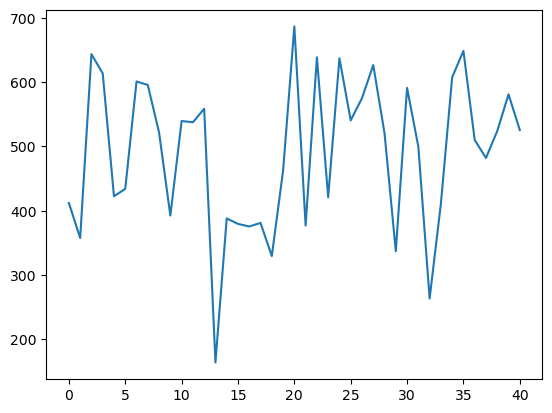

In [119]:
plt.plot(yearsum_ssp)

### Chill hour

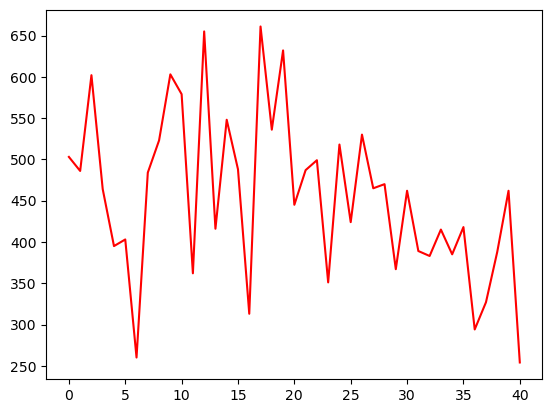

In [121]:
chill_hours = xr.where((temp>= 0) & (temp <= 7.2), 1 , np.nan)    #returns the variable 'chill_hours' with boolean values
chill_hours_year_ssp = chill_hours.groupby('time.year').sum(dim='time')
plt.plot(chill_hours_year_ssp, color='red')

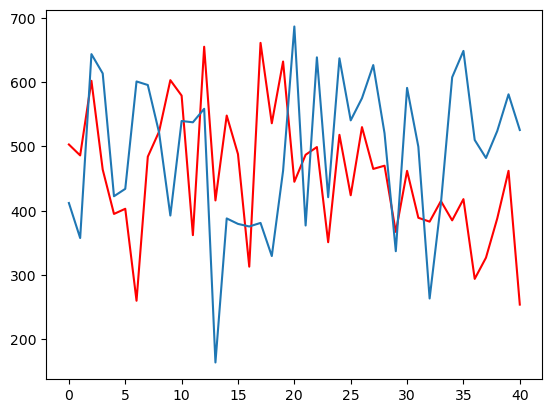

In [122]:
#comparison between apple models
plt.plot(chill_hours_year_ssp, color='red') #chill hour model
plt.plot(yearsum_ssp) #utah